# Aprendizaje Supervisado

In [1]:
#Importaciones iniciales
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

## Lectura de Datos

Como ya se quitó la estacionalidad en tareas anteriores, ya leemos directamente esos datos.

In [2]:
#Lectura de datos
datosGeneracion = pd.read_excel("../Datasets/Información Planta Solar Estacionaria.xlsx")
datosGeneracion.head(4)

,Fecha,Anio,Mes,NumMes,NumSemana,NumDiaAnio,Dia,NumDia,Hora,NumHora,...,Generacion_diff,Temperatura_diff,ProbabilidadLluvia_diff,HumedadRelativa_diff,VelocidadViento_diff,DireccionViento_diff,IndiceUV_diff,VelocidadRafaga_diff,Precipitacion_diff,DPT_diff
0,2021-07-01 00:00:00,2021,199,7,27,180,6026,1,144600,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-07-01 01:00:00,2021,199,7,27,180,6026,1,144601,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-07-01 02:00:00,2021,199,7,27,180,6026,1,144602,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-07-01 03:00:00,2021,199,7,27,180,6026,1,144603,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Selección de columnas
datosGeneracion_sel = datosGeneracion[['Generacion_diff', 'NumSemana', 'NumDiaAnio', 'Hora', 'ProbabilidadLluvia_diff', 'CoberturaNubes',
                                        'CodDirViento', 'DPT_diff', 'VelocidadViento_diff', 'Temperatura_diff', 'IndiceUV_diff', 'CodCondCielo']]
datosGeneracion_sel.head(4)

,Generacion_diff,NumSemana,NumDiaAnio,Hora,ProbabilidadLluvia_diff,CoberturaNubes,CodDirViento,DPT_diff,VelocidadViento_diff,Temperatura_diff,IndiceUV_diff,CodCondCielo
0,NaN,27,180,144600,NaN,70,4,NaN,NaN,NaN,NaN,4
1,NaN,27,180,144601,NaN,70,4,NaN,NaN,NaN,NaN,2
2,NaN,27,180,144602,NaN,70,4,NaN,NaN,NaN,NaN,2
3,NaN,27,180,144603,NaN,70,4,NaN,NaN,NaN,NaN,2


In [4]:
#Eliminamos filas vacias (las primeras 24, por el ejercicio de diferenciación)
datosGeneracion_dropna = datosGeneracion_sel.dropna()
datosGeneracion_dropna.head(4)

,Generacion_diff,NumSemana,NumDiaAnio,Hora,ProbabilidadLluvia_diff,CoberturaNubes,CodDirViento,DPT_diff,VelocidadViento_diff,Temperatura_diff,IndiceUV_diff,CodCondCielo
24,0.0,27,181,144624,4.0,70,4,0.0,-2.0,-1.0,0.0,4
25,0.0,27,181,144625,8.0,70,4,0.0,0.0,0.0,0.0,4
26,0.0,27,181,144626,5.0,70,4,0.0,-2.0,0.0,0.0,2
27,0.0,27,181,144627,0.0,70,4,-1.0,0.0,-1.0,0.0,2


In [5]:
#Normalizamos los datos con el MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(datosGeneracion_dropna)
datosGeneracion_scaled = pd.DataFrame(scaled, columns = datosGeneracion_dropna.columns, index = datosGeneracion_dropna.index)
datosGeneracion_scaled_r = datosGeneracion_scaled.round(4)
datosGeneracion_scaled_r.head(4)

,Generacion_diff,NumSemana,NumDiaAnio,Hora,ProbabilidadLluvia_diff,CoberturaNubes,CodDirViento,DPT_diff,VelocidadViento_diff,Temperatura_diff,IndiceUV_diff,CodCondCielo
24,0.5002,0.5,0.5028,0.0000,0.5280,0.7,0.375,0.5072,0.5590,0.4474,0.4444,0.75
25,0.5002,0.5,0.5028,0.0001,0.5528,0.7,0.375,0.5072,0.5842,0.4737,0.4444,0.75
26,0.5002,0.5,0.5028,0.0001,0.5342,0.7,0.375,0.5072,0.5590,0.4737,0.4444,0.25
27,0.5002,0.5,0.5028,0.0002,0.5031,0.7,0.375,0.4928,0.5842,0.4474,0.4444,0.25


In [6]:
#Imprimimos en formato latex para mostrarlo en el artículo
print(datosGeneracion_scaled_r.iloc[0:4,].to_latex(index = False))

\begin{tabular}{rrrrrrrrrrrr}
\toprule
Generacion_diff & NumSemana & NumDiaAnio & Hora & ProbabilidadLluvia_diff & CoberturaNubes & CodDirViento & DPT_diff & VelocidadViento_diff & Temperatura_diff & IndiceUV_diff & CodCondCielo \\
\midrule
0.500200 & 0.500000 & 0.502800 & 0.000000 & 0.528000 & 0.700000 & 0.375000 & 0.507200 & 0.559000 & 0.447400 & 0.444400 & 0.750000 \\
0.500200 & 0.500000 & 0.502800 & 0.000100 & 0.552800 & 0.700000 & 0.375000 & 0.507200 & 0.584200 & 0.473700 & 0.444400 & 0.750000 \\
0.500200 & 0.500000 & 0.502800 & 0.000100 & 0.534200 & 0.700000 & 0.375000 & 0.507200 & 0.559000 & 0.473700 & 0.444400 & 0.250000 \\
0.500200 & 0.500000 & 0.502800 & 0.000200 & 0.503100 & 0.700000 & 0.375000 & 0.492800 & 0.584200 & 0.447400 & 0.444400 & 0.250000 \\
\bottomrule
\end{tabular}



## Entrenamiento para elegir mejor modelo

In [7]:
#Importaciones de todos los modelos
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, LogisticRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.pipeline import make_pipeline

In [57]:
#Función con modelos elegidos para probar
def fit(x, y, reg_model = 'RF', n_components = 3, n_jobs = None):
    match reg_model:
        case 'Bagging':
            model = BaggingRegressor(n_jobs = n_jobs)
        case 'ArbolDecision':
            model = DecisionTreeRegressor(max_depth = 2)
        case 'ReforzamientoAda':
            model = AdaBoostRegressor()
        case 'BayesianRidge':
            model = BayesianRidge()
        case 'Gradiente':
            model = GradientBoostingRegressor()
        case 'RegresionLineal':
            model = LinearRegression(n_jobs = n_jobs)
        case 'RandomForest':
            model = RandomForestRegressor(n_jobs = n_jobs)
    model.fit(x, y)
    return model

In [14]:
#Librerías de las métricas
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [11]:
#Datos de Entrenamiento
datosGeneracion_train = datosGeneracion_scaled.sample(frac = 0.7)
y_train = datosGeneracion_train[['Generacion_diff']]
x_train = datosGeneracion_train[['NumSemana', 'NumDiaAnio', 'Hora', 'ProbabilidadLluvia_diff', 'CoberturaNubes',
                                'CodDirViento', 'DPT_diff', 'VelocidadViento_diff', 'Temperatura_diff', 'IndiceUV_diff', 'CodCondCielo']]

In [12]:
#Datos de Prueba
datosGeneracion_test = datosGeneracion_scaled.drop(datosGeneracion_train.index)
y_test = datosGeneracion_test[['Generacion_diff']]
x_test = datosGeneracion_test[['NumSemana', 'NumDiaAnio', 'Hora', 'ProbabilidadLluvia_diff', 'CoberturaNubes',
                                'CodDirViento', 'DPT_diff', 'VelocidadViento_diff', 'Temperatura_diff', 'IndiceUV_diff', 'CodCondCielo']]

In [58]:
#Procesamos los modelos
from tqdm import tqdm
import multiprocessing
from timeit import default_timer as timer
try:
        df_results_ed = pd.read_csv('./Resultados_modelos_Tarea06.csv', index_col = 0)
except:
        models_ed = ['ArbolDecision', 'ReforzamientoAda', 'BayesianRidge',
                     'Gradiente',  'RandomForest', 'RegresionLineal', 'Bagging']
        n_jobs = multiprocessing.cpu_count()
        results_ed = {
                'model' : [],
                'mse' : [],
                'rmse' : [],
                'mae' : [],
                'r2' : [],
                'mape' : [],
                'time' : []
        }
        for i in tqdm(range(30)):
                for m in models_ed:
                        start = timer()
                        datosGeneracion_train = datosGeneracion_scaled.sample(frac = 0.7)
                        y_train = datosGeneracion_train[['Generacion_diff']]
                        x_train = datosGeneracion_train[['NumSemana', 'NumDiaAnio', 'Hora', 'ProbabilidadLluvia_diff',
                                                         'CoberturaNubes', 'CodDirViento', 'DPT_diff', 'VelocidadViento_diff',
                                                         'Temperatura_diff', 'IndiceUV_diff', 'CodCondCielo']]
                        datosGeneracion_test = datosGeneracion_scaled.drop(datosGeneracion_train.index)
                        y_test = datosGeneracion_test[['Generacion_diff']]
                        x_test = datosGeneracion_test[['NumSemana', 'NumDiaAnio', 'Hora', 'ProbabilidadLluvia_diff',
                                                       'CoberturaNubes', 'CodDirViento', 'DPT_diff', 'VelocidadViento_diff',
                                                       'Temperatura_diff', 'IndiceUV_diff', 'CodCondCielo']]
                        model = fit(x_train, y_train.Generacion_diff.ravel(), m, n_jobs = n_jobs)
                        end = timer()
                        y_pred = model.predict(x_test)
                        results_ed['model'].append(m)
                        results_ed['mse'].append(mse(y_test, y_pred))
                        results_ed['rmse'].append(np.sqrt(mse(y_test, y_pred)))
                        results_ed['mae'].append(mae(y_test, y_pred))
                        results_ed['r2'].append(r2(y_test, y_pred))
                        results_ed['mape'].append(mape(y_test, y_pred))
                        results_ed['time'].append(end - start)

                df_results_ed = pd.DataFrame(results_ed)
                df_results_ed.to_csv('./Resultados_modelos_Tarea06.csv')

100%|██████████| 30/30 [08:45<00:00, 17.53s/it]


## RMSE

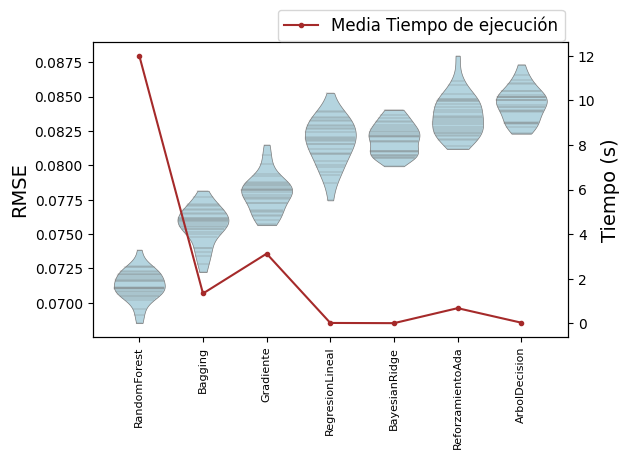

In [67]:
df_results_ed = df_results_ed.sort_values('rmse')
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('rmse')
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
sns.violinplot(x="model", y="rmse", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 8)
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('')

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

## MAE

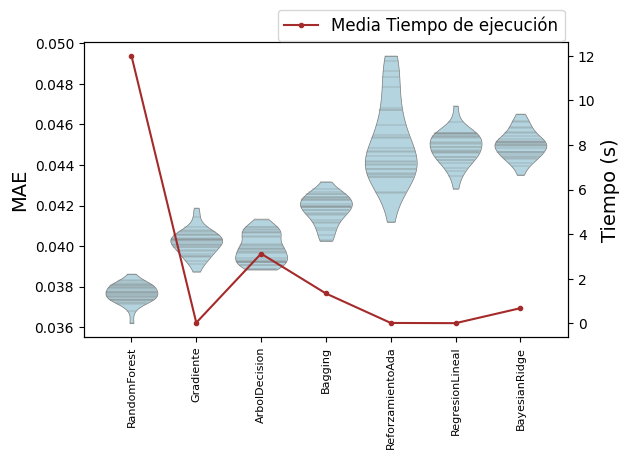

In [71]:
df_results_ed = df_results_ed.sort_values('mae')
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('mae')
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
sns.violinplot(x="model", y="mae", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 8)
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('')

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

## R2

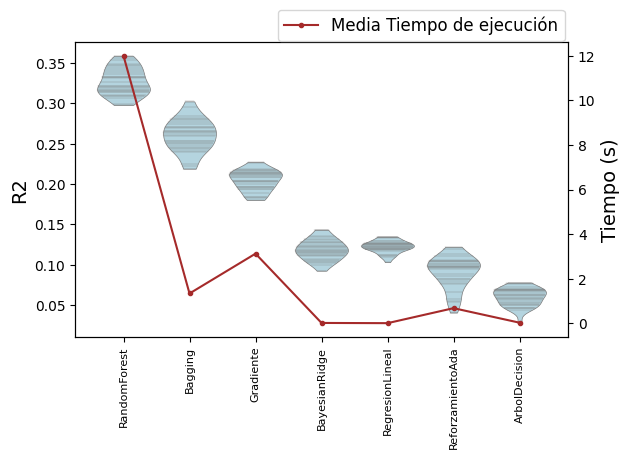

In [72]:
df_results_ed = df_results_ed.sort_values('r2', ascending=False)
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('r2', ascending=False)
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
sns.violinplot(x="model", y="r2", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 8)
plt.ylabel('R2', fontsize = 14)
plt.xlabel('')

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

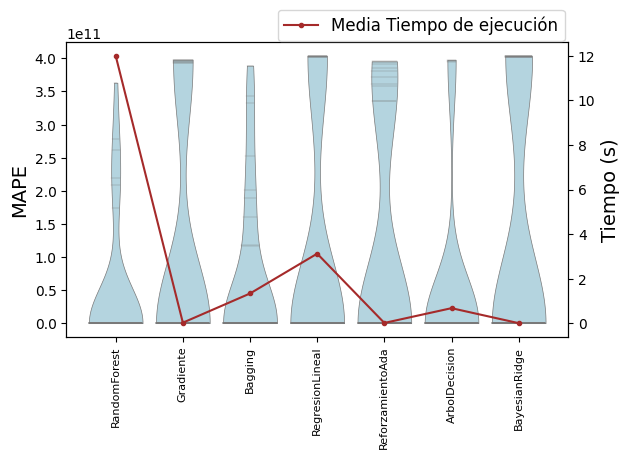

In [73]:
df_results_ed = df_results_ed.sort_values('mape')
gp_results_ed = df_results_ed.groupby('model').mean()
gp_results_ed = gp_results_ed.sort_values('mape')
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
sns.violinplot(x="model", y="mape", data=df_results_ed, cut=0, inner = 'stick', scale = 'width', linewidth = 0.5, color = 'lightblue')
plt.xticks(rotation = 90, fontsize = 8)
plt.ylabel('MAPE', fontsize = 14)
plt.xlabel('')

ax2 = ax.twinx()
ax2.plot(gp_results_ed.time, '.-', c = 'brown', label = 'Media Tiempo de ejecución')
plt.ylabel('Tiempo (s)', fontsize = 14)
plt.legend(bbox_to_anchor = (1.01, 1.14), fontsize = 12)
plt.tight_layout()
plt.show()

## Método Random Forest

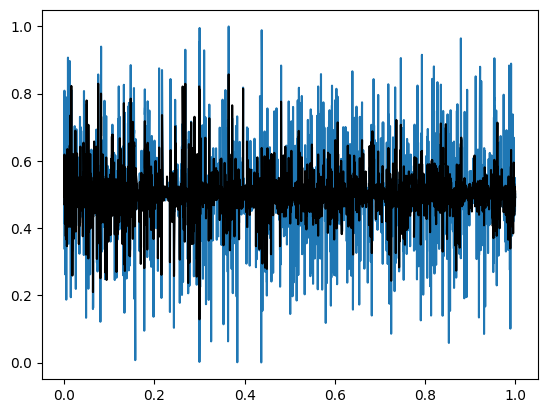

In [111]:
modelRF = RandomForestRegressor()
modelRF.fit(x_train, y_train)
y_pred_RF = modelRF.predict(x_test)
plt.plot(x_test["Hora"], y_test)
plt.plot(x_test["Hora"], y_pred_RF, c = 'black')

In [112]:
df_y_pred = pd.DataFrame(y_pred_RF, index = y_test.index, columns = ['Generacion_diff'])
df_y_pred

,Generacion_diff
27,0.494382
34,0.605183
36,0.618757
37,0.563249
38,0.487538
...,...
18925,0.503939
18934,0.467438
18937,0.495339
18943,0.489454


In [113]:
#Indicamos las filas que han sido predecidas por el método Bagging
datosGeneracion['predecida'] = 0
datosGeneracion.loc[df_y_pred.index, 'predecida'] = 1

In [114]:
#Igualamos la predición con la generación
datosGeneracion['prediccion_diff'] = datosGeneracion_scaled['Generacion_diff']

In [115]:
#Asignamos los datos de predicción a la columna
datosGeneracion.loc[df_y_pred.index, 'prediccion_diff'] = df_y_pred['Generacion_diff']

In [116]:
#Obtenemos el máximo y el mínimo para desecalar
max_value = datosGeneracion_dropna["Generacion_diff"].max()
min_value = datosGeneracion_dropna["Generacion_diff"].min()

In [117]:
#Desescalamos
datosGeneracion["Prediction"] = round((datosGeneracion["prediccion_diff"] * (max_value - min_value)) + min_value, 2)

In [118]:
#Inicializamos la columna de predicción final con 0
datosGeneracion['Prediction_final'] = 0

In [119]:
#Pasamos los primeros 24 registros de la generación original a las columnas predictivas
datosGeneracion.loc[0:24, 'Prediction'] = datosGeneracion.loc[0:24, 'Generacion']
datosGeneracion.loc[0:24, 'Prediction_final'] = datosGeneracion.loc[0:24, 'Generacion']

In [120]:
#Desdiferenciamos topando mínimo con 0 y máximo con 30000
for i in range(24, len(datosGeneracion)):
    datosGeneracion['Prediction_final'][i] = min(max(datosGeneracion['Prediction'][i] + datosGeneracion["Prediction_final"][i-24], 0), 30000)

In [121]:
#Condicionamos a que haya valores si el Índice UV tiene valor
datosGeneracion['Prediction_UV'] = datosGeneracion['Prediction_final']
datosGeneracion.loc[(datosGeneracion['IndiceUV'] == 0), 'Prediction_UV'] = 0

In [122]:
mae(datosGeneracion[['Generacion']], datosGeneracion[['Prediction_final']])

7587.609699604138

In [123]:
mae(datosGeneracion[['Generacion']], datosGeneracion[['Prediction_UV']])

3364.14203924839

In [124]:
datosGeneracion.loc[0:50,['Generacion', 'Prediction', 'Prediction_final', 'Prediction_UV', 'predecida']]

,Generacion,Prediction,Prediction_final,Prediction_UV,predecida
0,0.0000,0.0000,0.0000,0.0000,0
1,0.0000,0.0000,0.0000,0.0000,0
2,0.0000,0.0000,0.0000,0.0000,0
3,0.0000,0.0000,0.0000,0.0000,0
4,0.0000,0.0000,0.0000,0.0000,0
5,0.0000,0.0000,0.0000,0.0000,0
6,0.0000,0.0000,0.0000,0.0000,0
7,252.4751,252.4751,252.4751,0.0000,0
8,789.4489,789.4489,789.4489,789.4489,0
9,1484.4438,1484.4438,1484.4438,1484.4438,0


In [125]:
def line_plotting(title, data, x, y, y2, x_label, y_label, width, height):
    """General function to plot"""
    plt.figure(figsize=(width,height))
    plt.plot(data[x], data[y], color='blue')   
    plt.plot(data[x], data[y2], color='black')  
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.tight_layout()
    plt.show()

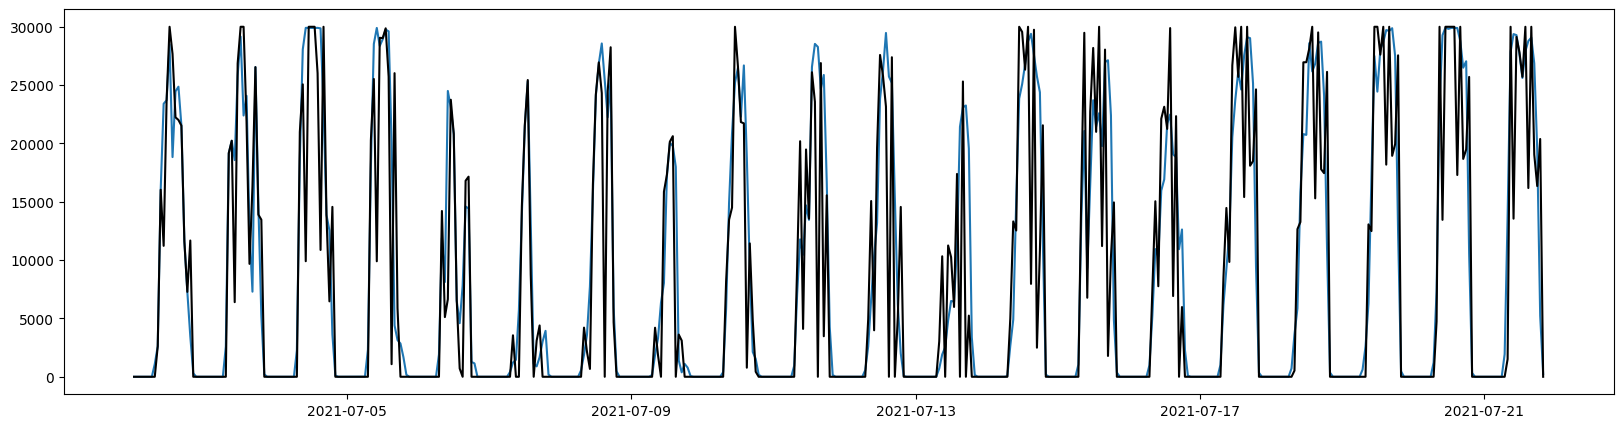

In [128]:
plt.figure(figsize=(20,5))
plt.plot(datosGeneracion.loc[24:500, "Fecha"], datosGeneracion.loc[24:500, "Generacion"])
plt.plot(datosGeneracion.loc[24:500, "Fecha"], datosGeneracion.loc[24:500, "Prediction_UV"], c = 'black')

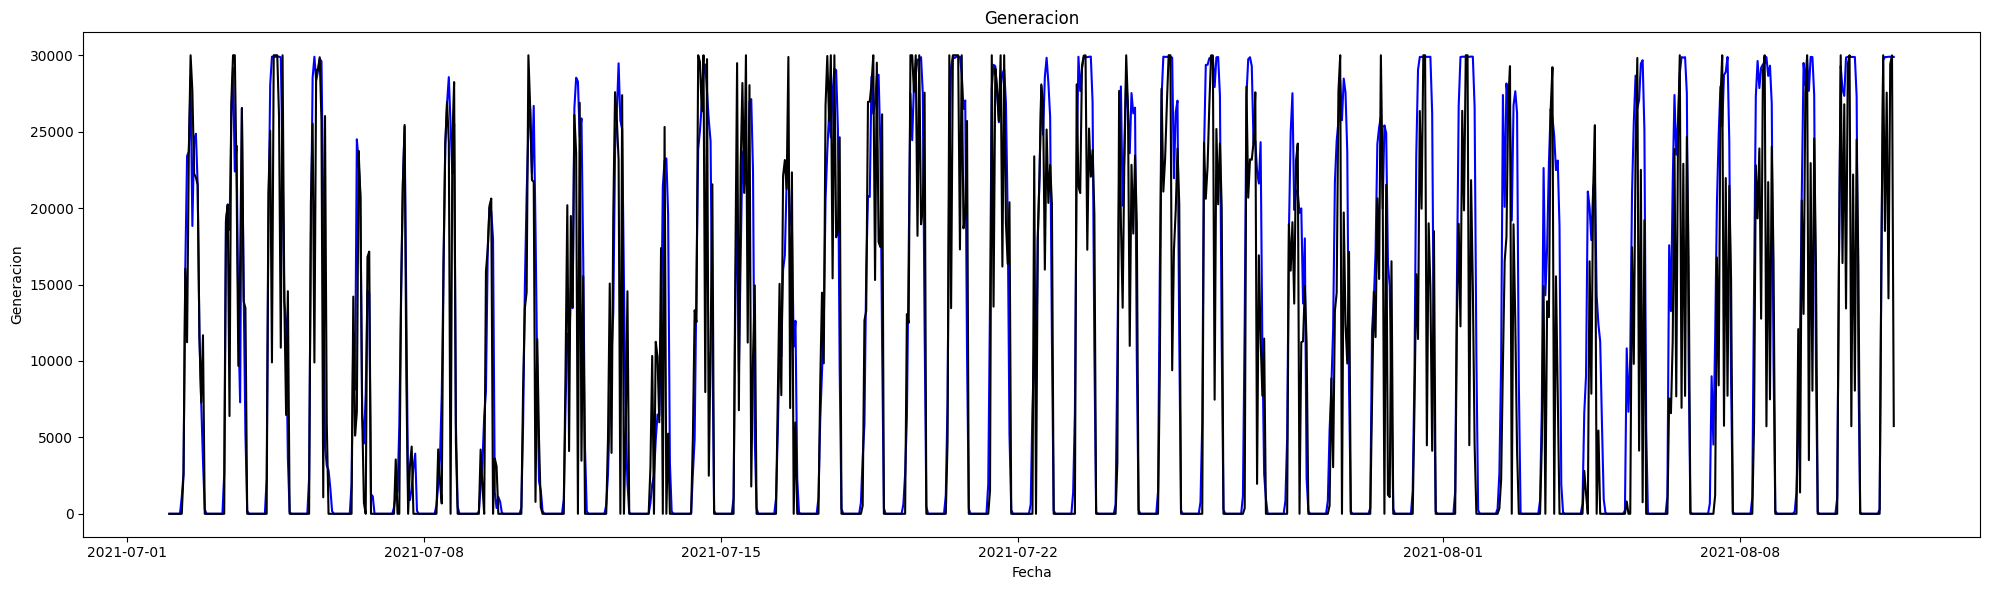

In [129]:
line_plotting('Generacion', datosGeneracion[24:1000], 'Fecha', 'Generacion', 'Prediction_UV', 'Fecha', 'Generacion', 20, 6)